In [1]:
# Raw Package
import numpy as np
import pandas as pd

import APIBackend as back

In [2]:

stock = back.stock()
# stock.ticker
ticker = '^GSPC' ### You Can Change the Ticker
stock_data = stock.getDailyStockInfo(ticker=ticker)




^GSPC
[*********************100%***********************]  1 of 1 completed


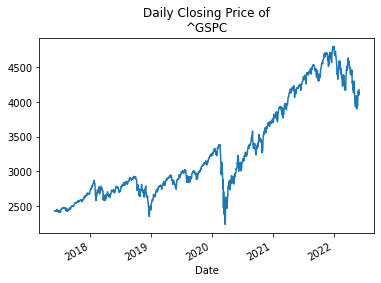

In [3]:
stock.plot_close_stock(stock_data)

In [4]:
# stock.data= stock.trim_data(stock_data, 5,2020)
# stock_data = stock.trim_data(stock_data, 5,2020)

c:\Users\meowm\OneDrive\Desktop\Winter2022\Python\StockModeling\APIBackend.py:45: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result_add = seasonal_decompose(data.Close,


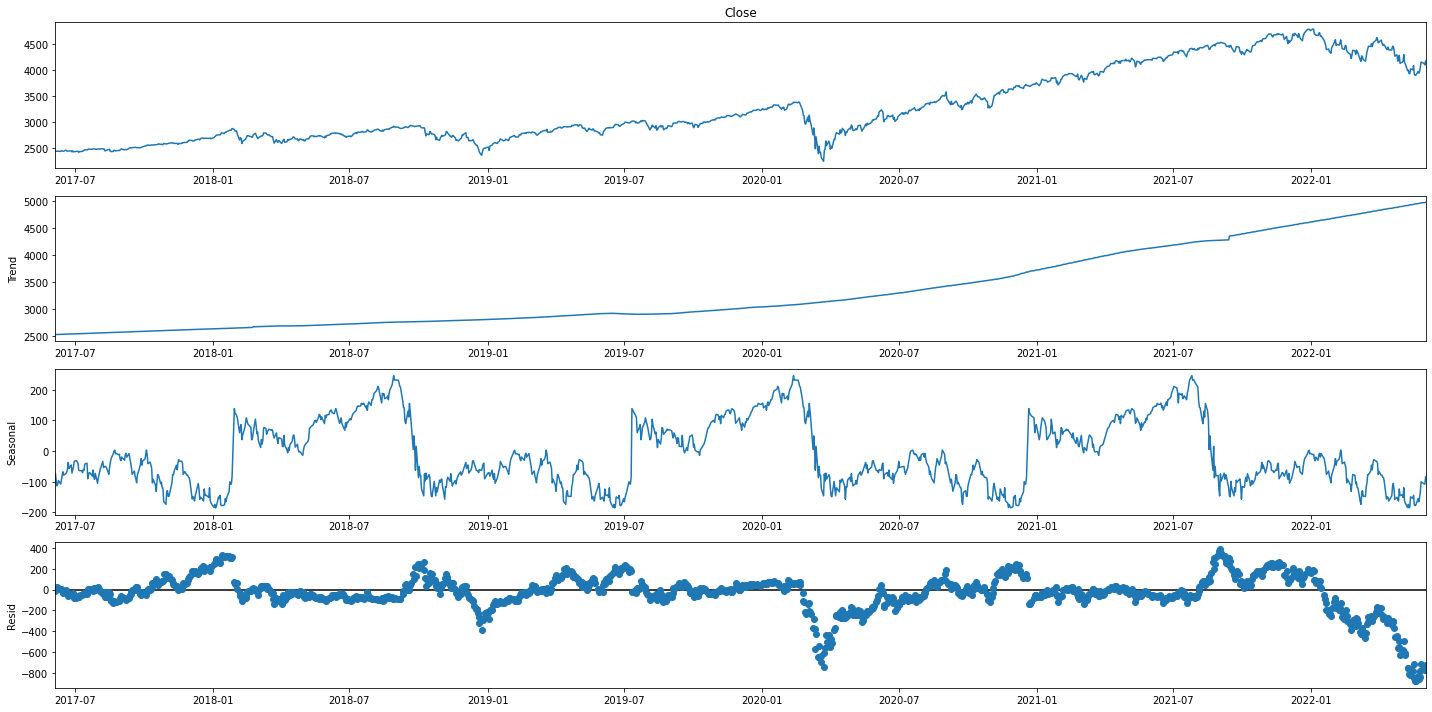

In [5]:
stock.getETSPlot()

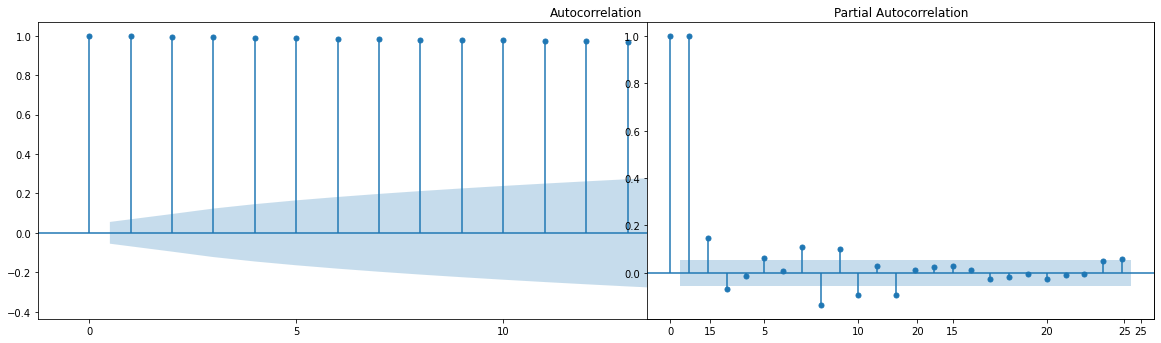

In [6]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from matplotlib import pyplot as plt

diff_stock = stock_data.dropna()



fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(211)
# fig = sm.graphics.tsa.plot_acf(stock_data.Close.dropna(),lags=24,ax=ax1)
fig = sm.graphics.tsa.plot_acf(diff_stock.Close,lags=24,ax=ax1)
ax2 = fig.add_subplot(222)
# fig = sm.graphics.tsa.plot_pacf(stock_data.Close.dropna(),lags=24,ax=ax2)
fig = sm.graphics.tsa.plot_pacf(diff_stock.Close,lags=24,ax=ax2)

<AxesSubplot:xlabel='Date'>

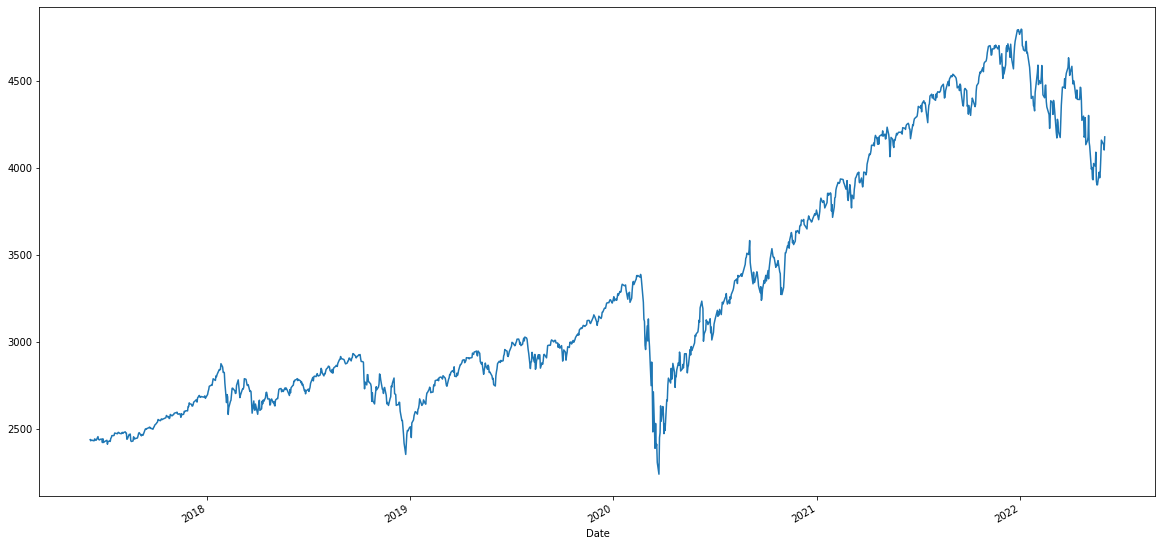

In [7]:
diff_stock.Close.plot()

In [8]:
## Modeling Section 

from sklearn.model_selection import TimeSeriesSplit
X = stock_data.index
y = stock_data.Close

stock_close_split = TimeSeriesSplit(n_splits=2).split(X, y)
all_splits = list(stock_close_split)


In [9]:
import statsmodels.api as sm
######################## Modeler Specifications ########################## You Can Change This Figures########################
ar = 2
ma = 3
###########################

model = sm.tsa.ARMA(stock_data.Close, order = (ar, ma))
results = model.fit()
print(results.summary())

c:\Users\meowm\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\meowm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1259
Model:                     ARMA(2, 3)   Log Likelihood               -6412.925
Method:                       css-mle   S.D. of innovations             39.327
Date:                Thu, 02 Jun 2022   AIC                          12839.850
Time:                        17:15:05   BIC                          12875.817
Sample:                             0   HQIC                         12853.366
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4208.4983        nan        nan        nan         nan         nan
ar.L1.Close     0.1426      0.033      4.377      0.000       0.079       0.206
ar.L2.Close     0.8564      0.033     26.296    

c:\Users\meowm\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


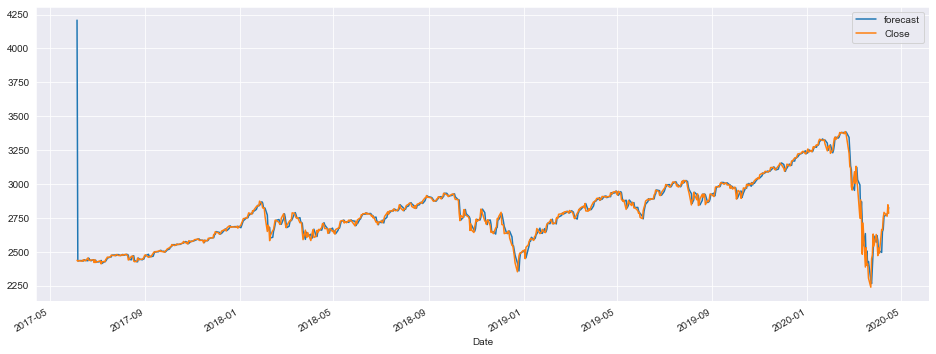

In [10]:
import seaborn as sns

# Define figure style, plot package and default figure size
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
 
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
 
# Use plot_predict and visualize forecasts
figure = results.plot_predict('2017',720, 840, dynamic=False, plot_insample=True)

In [11]:
print(f'MAE: {sum(np.abs(results.fittedvalues-y))/len(y)}')  ## Error Term Mean Abosult Error; MAE Measure On Average we are xx.xx dollars of from the actual
print(f'MAPE: {sum(np.abs(results.fittedvalues-y)/y)/len(y)}' ) ## Error Term Mean Abosulte Percent Error; MAPE Measure on average what is the percent difference from actual

MAE: 27.204682803609586
MAPE: 0.008436588705554346


In [12]:
from dateutil.relativedelta import relativedelta, MO

df=pd.DataFrame(y)
df.index.name = ''
df['Result'] = 'Actual'

days_to_forecast = 365 ## You Change This

forecasted_results =results.forecast(steps = days_to_forecast)[0]
start_date = y.index[-1] + relativedelta(days=1)

forecast_index = pd.date_range(start = start_date, periods=len(forecasted_results), freq = 'B')
forecast_df = pd.DataFrame(index=forecast_index, data={'Close':forecasted_results})
forecast_df['Result'] = 'Forecasted'
combined_df =pd.concat([df,forecast_df], axis = 0)
combined_df['Close'] = np.round(combined_df['Close'],2)

In [13]:
# import altair as alt

# # Create a selection that chooses the nearest point & selects based on x-value
# nearest = alt.selection(type='single', nearest=True, on='mouseover',
#                         fields=['Close'], empty='none')

# alt.Chart(combined_df.reset_index()).mark_line().encode(
#     x =  'index:T',
#     y = 'Close:Q',
#     color = 'Result',
#     tooltip = ['index','Close','Result']
# ).interactive().properties(
#     width=800,
#     height=500
# ).add_selection(
#     nearest
# ).configure_point(
#     size = 200
# )

In [14]:
## Second Chart
import altair as alt

### https://altair-viz.github.io/gallery/multiline_tooltip.html

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['index','Close'], empty='none')

# The basic line
line = alt.Chart(combined_df.reset_index()).mark_line(interpolate='basis').encode(
    x =  'index:T',
    y = 'Close:Q',
    color = 'Result'
    # tooltip = ['index','Close','Result']
)

selectors = alt.Chart(combined_df.reset_index()).mark_point().encode(
    x='index:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=20, dy = -15, size = 20).encode(
    text=alt.condition(nearest, 'Close:Q', alt.value(' '))
)

text_index = line.mark_text(align='left', dx=5, dy=-40, size = 20).encode(
    text=alt.condition(nearest, 'index:T', alt.value(''))
)

rules = alt.Chart(combined_df.reset_index()).mark_rule(color='gray').encode(
    x='index:T',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, text_index, text 
).properties(
    width=1200, height=600
).interactive()


### Zoom in and out normally
### Double Click to reset graoh

alt.LayerChart(...)

In [24]:
######################## Modeler Specifications ########################## You Can Change This Figures########################
ar = [0]
ma = [0]

###########################

model = sm.tsa.arima.ARIMA(stock_data.Close, order=(ar,1,ma), seasonal_order = (1,0,0,365))
results = model.fit()
print(results.summary())



c:\Users\meowm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\meowm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\meowm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\Users\meowm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting para

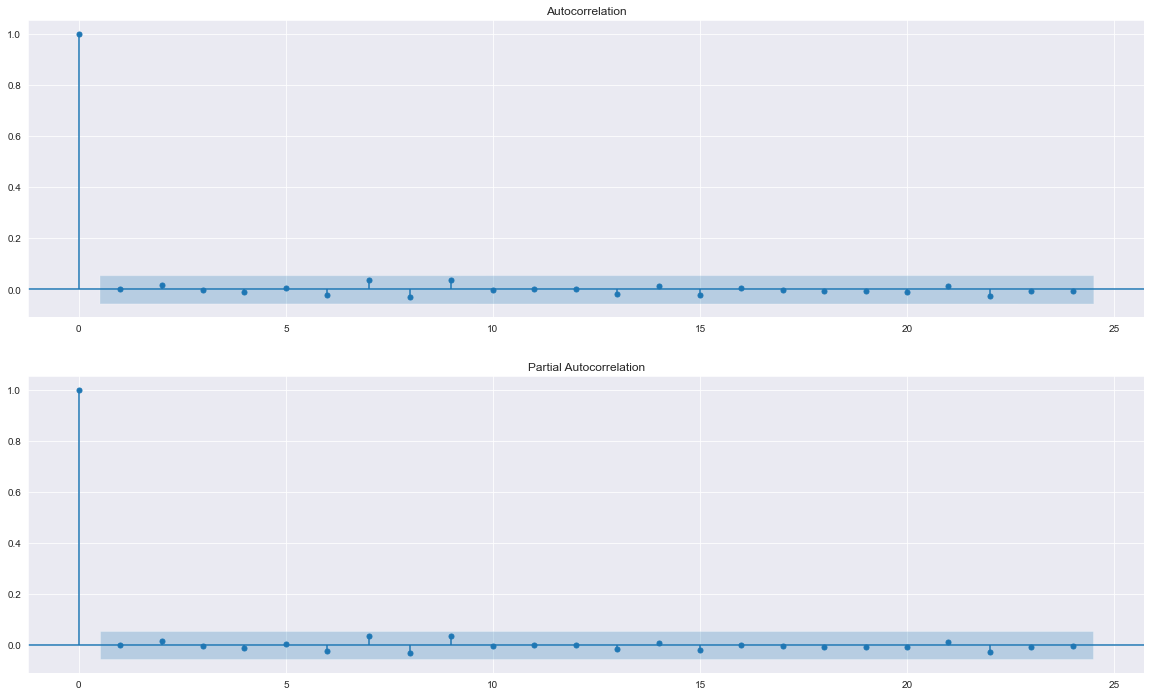

In [ ]:
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(211)
# fig = sm.graphics.tsa.plot_acf(stock_data.Close.dropna(),lags=24,ax=ax1)
fig = sm.graphics.tsa.plot_acf(results.resid,lags=24,ax=ax1)
ax2 = fig.add_subplot(212)
# fig = sm.graphics.tsa.plot_pacf(stock_data.Close.dropna(),lags=24,ax=ax2)
fig = sm.graphics.tsa.plot_pacf(results.resid,lags=24,ax=ax2)

In [ ]:
from dateutil.relativedelta import relativedelta, MO

df=pd.DataFrame(y)
df.index.name = ''
df['Result'] = 'Actual'

days_to_forecast = 365 ## You Change This

forecasted_results =results.forecast(steps = days_to_forecast)
start_date = y.index[-1] + relativedelta(days=1)

forecast_index = pd.date_range(start = start_date, periods=len(forecasted_results), freq = 'B')
forecast_df= pd.DataFrame({'Close':forecasted_results})
forecast_df.index = forecast_index
forecast_df['Result'] = 'Forecasted'
combined_df =pd.concat([df,forecast_df], axis = 0)
combined_df['Close'] = np.round(combined_df['Close'],2)

c:\Users\meowm\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [ ]:
combined_df

,Close,Result
2017-06-05,2436.10,Actual
2017-06-06,2429.33,Actual
2017-06-07,2433.14,Actual
2017-06-08,2433.79,Actual
2017-06-09,2431.77,Actual
...,...,...
2023-10-20,4152.28,Forecasted
2023-10-23,4148.19,Forecasted
2023-10-24,4150.03,Forecasted
2023-10-25,4151.16,Forecasted


In [ ]:
## Second Chart
import altair as alt

### https://altair-viz.github.io/gallery/multiline_tooltip.html

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['index','Close'], empty='none')

# The basic line
line = alt.Chart(combined_df.reset_index()).mark_line(interpolate='basis').encode(
    x =  'index:T',
    y = 'Close:Q',
    color = 'Result'
    # tooltip = ['index','Close','Result']
)

selectors = alt.Chart(combined_df.reset_index()).mark_point().encode(
    x='index:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=20, dy = -15, size = 20).encode(
    text=alt.condition(nearest, 'Close:Q', alt.value(' '))
)

text_index = line.mark_text(align='left', dx=5, dy=-40, size = 20).encode(
    text=alt.condition(nearest, 'index:T', alt.value(''))
)

rules = alt.Chart(combined_df.reset_index()).mark_rule(color='gray').encode(
    x='index:T',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, text_index, text 
).properties(
    width=800, height=600
).interactive()


### Zoom in and out normally
### Double Click to reset graph

alt.LayerChart(...)